In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

pd.set_option('display.max_columns', None)
##지수식 없애기(e 제거)
np.set_printoptions(precision=6, suppress=True)
pd.options.display.float_format = '{:.5f}'.format

In [3]:
train = pd.read_csv('/content/gdrive/MyDrive/AI/dataset/tabular-playground-series-dec-2021/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/AI/dataset/tabular-playground-series-dec-2021/test.csv')
sample_submission = pd.read_csv('/content/gdrive/MyDrive/AI/dataset/tabular-playground-series-dec-2021/sample_submission.csv')

In [45]:
train_df = train.drop(['Id'],axis=1)
test_df = test.drop(['Id'],axis=1)

In [ ]:
train_df.head(20)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3189,40,8,30,13,3270,206,234,193,4873,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,3026,182,5,280,29,3270,233,240,106,5423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2,3106,13,7,351,37,2914,208,234,137,5269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3022,276,13,192,16,3034,207,238,156,2866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
4,2906,186,13,266,22,2916,231,231,154,2642,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
5,3115,144,2,415,61,3371,223,231,131,2629,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
6,2930,61,5,312,32,3731,225,248,163,2946,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
7,3208,94,4,187,63,7151,231,228,173,5153,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
8,3182,67,12,126,22,3098,240,226,121,2512,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
9,2892,46,16,231,73,4591,231,249,106,3101,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
train_df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


# 함수 정의

In [46]:
new_names = {
    "Horizontal_Distance_To_Hydrology": "x_dist_hydrlgy",
    "Vertical_Distance_To_Hydrology": "y_dist_hydrlgy",
    "Horizontal_Distance_To_Roadways": "x_dist_rdwys",
    "Horizontal_Distance_To_Fire_Points": "x_dist_firepts"
}

train_df.rename(new_names, axis=1, inplace=True)
test_df.rename(new_names, axis=1, inplace=True)

In [47]:
# Manhhattan distance to Hydrology
train_df["mnhttn_dist_hydrlgy"] = np.abs(train_df["x_dist_hydrlgy"]) + np.abs(train_df["y_dist_hydrlgy"])
test_df["mnhttn_dist_hydrlgy"] = np.abs(test_df["x_dist_hydrlgy"]) + np.abs(test_df["y_dist_hydrlgy"])

# Euclidean distance to Hydrology
train_df["ecldn_dist_hydrlgy"] = (train_df["x_dist_hydrlgy"]**2 + train_df["y_dist_hydrlgy"]**2)**0.5
test_df["ecldn_dist_hydrlgy"] = (test_df["x_dist_hydrlgy"]**2 + test_df["y_dist_hydrlgy"]**2)**0.5

In [48]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

feature = train_df.drop(['Cover_Type'], axis = 1)
Hillshade = train_df[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].columns
Wilderness_Area = train_df[['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']].columns
Horizontal = train_df[['x_dist_firepts', 'x_dist_rdwys', 'x_dist_hydrlgy','y_dist_hydrlgy']].columns
Soil_Type = train_df[['Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type8','Soil_Type9','Soil_Type10',
                      'Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
                      'Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30',
                      'Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40']].columns
num_cols = ['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4','Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type8','Soil_Type9','Soil_Type10',
                      'Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
                      'Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30',
                      'Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40']



def classifier_eval(y_valid , y_pred) :
  print('정확도(accuracy_score) : ', accuracy_score(y_valid, y_pred))

def add_statistics(df) :
  df['mean'] = df.mean(axis=1)
  df['min'] = df.min(axis=1)
  df['max'] = df.max(axis=1)

def add_Statistic_by_section(df) :
  ## MEAN
  df['HillShade_mean'] = df[Hillshade].mean(axis=1)
  df['Wilderness_Area_mean'] = df[Wilderness_Area].mean(axis=1)
  df['Horizontal_mean'] = df[Horizontal].mean(axis=1)
  df['Soil_Type_mean'] = df[Soil_Type].mean(axis = 1)

  ## MIN
  df['HillShade_min'] = df[Hillshade].min(axis=1)
  df['Wilderness_Area_min'] = df[Wilderness_Area].min(axis=1)
  df['Horizontal_min'] = df[Horizontal].min(axis=1)
  df['Soil_Type_min'] = df[Soil_Type].min(axis = 1)

  ## MAX
  df['HillShade_max'] = df[Hillshade].max(axis=1)
  df['Wilderness_Area_max'] = df[Wilderness_Area].max(axis=1)
  df['Horizontal_max'] = df[Horizontal].max(axis=1)
  df['Soil_Type_max'] = df[Soil_Type].max(axis = 1)

  ## VAR
  df['HillShade_var'] = df[Hillshade].var(axis=1)
  df['Wilderness_Area_var'] = df[Wilderness_Area].var(axis=1)
  df['Horizontal_var'] = df[Horizontal].var(axis=1)
  df['Soil_Type_var'] = df[Soil_Type].var(axis = 1)

  ## SUM
  df['HillShade_sum'] = df[Hillshade].sum(axis=1)
  df['Wilderness_Area_sum'] = df[Wilderness_Area].sum(axis=1)
  df['Horizontal_sum'] = df[Horizontal].sum(axis=1)
  df['Soil_Type_sum'] = df[Soil_Type].sum(axis = 1)

  ## KURT     
  df['Wilderness_Area_kurt'] = df[Wilderness_Area].kurt(axis=1)
  df['Soil_Type_kurt'] = df[Soil_Type].kurt(axis = 1) 

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df    


# 데이터 프로세싱

In [49]:
# Mask training set
train_df['Slope'][train_df['Slope'] < 0]=0
train_df['x_dist_hydrlgy'][train_df['x_dist_hydrlgy'] < 0]=0
train_df['y_dist_hydrlgy'][train_df['y_dist_hydrlgy'] < 0]=0
train_df['x_dist_rdwys'][train_df['x_dist_rdwys'] < 0]=0
train_df['x_dist_firepts'][train_df['x_dist_firepts'] < 0]=0

# Mask test set
test_df['Slope'][test_df['Slope'] < 0]=0
test_df['x_dist_hydrlgy'][test_df['x_dist_hydrlgy'] < 0]=0
test_df['y_dist_hydrlgy'][test_df['y_dist_hydrlgy'] < 0]=0
test_df['x_dist_rdwys'][test_df['x_dist_rdwys'] < 0]=0
test_df['x_dist_firepts'][test_df['x_dist_firepts'] < 0]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying t

In [50]:
# Project training aspect angles onto [0,360]
train_df['Aspect'][train_df['Aspect'] < 0] += 360
train_df['Aspect'][train_df['Aspect'] >= 360] -= 360

# Project test aspect angles onto [0,360]
test_df['Aspect'][test_df['Aspect'] < 0] += 360
test_df['Aspect'][test_df['Aspect'] >= 360] -= 360

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
# Euclidean distance to Hydrology (training set)
train_df["ED_to_Hydrology"] = np.sqrt(train_df['x_dist_hydrlgy']**2 + train_df['y_dist_hydrlgy']**2)

# Euclidean distance to Hydrology (test set)
test_df["ED_to_Hydrology"] = np.sqrt(test_df['x_dist_hydrlgy']**2 + test_df['y_dist_hydrlgy']**2)

In [52]:
# Mask training set from below
train_df.loc[train_df['Hillshade_9am'] < 0, 'Hillshade_9am'] = 0
train_df.loc[train_df['Hillshade_Noon'] < 0, 'Hillshade_Noon'] = 0
train_df.loc[train_df['Hillshade_3pm'] < 0, 'Hillshade_3pm'] = 0

# Mask training set from above
train_df.loc[train_df['Hillshade_9am'] > 255, 'Hillshade_9am'] = 255
train_df.loc[train_df['Hillshade_Noon'] > 255, 'Hillshade_Noon'] = 255
train_df.loc[train_df['Hillshade_3pm'] > 255, 'Hillshade_3pm'] = 255

# Mask test set from below
test_df.loc[test_df['Hillshade_9am'] < 0, 'Hillshade_9am'] = 0
test_df.loc[test_df['Hillshade_Noon'] < 0, 'Hillshade_Noon'] = 0
test_df.loc[test_df['Hillshade_3pm'] < 0, 'Hillshade_3pm'] = 0

# Mask test set from above
test_df.loc[test_df['Hillshade_9am'] > 255, 'Hillshade_9am'] = 255
test_df.loc[test_df['Hillshade_Noon'] > 255, 'Hillshade_Noon'] = 255
test_df.loc[test_df['Hillshade_3pm'] > 255, 'Hillshade_3pm'] = 255

In [53]:
# Manhhattan distance to Hydrology
train_df["mnhttn_dist_hydrlgy"] = np.abs(train_df["x_dist_hydrlgy"]) + np.abs(train_df["y_dist_hydrlgy"])
test_df["mnhttn_dist_hydrlgy"] = np.abs(test_df["x_dist_hydrlgy"]) + np.abs(test_df["y_dist_hydrlgy"])

# Euclidean distance to Hydrology
train_df["ecldn_dist_hydrlgy"] = (train_df["x_dist_hydrlgy"]**2 + train_df["y_dist_hydrlgy"]**2)**0.5
test_df["ecldn_dist_hydrlgy"] = (test_df["x_dist_hydrlgy"]**2 + test_df["y_dist_hydrlgy"]**2)**0.5

In [24]:
train_df.describe()

,Elevation,Aspect,Slope,x_dist_hydrlgy,y_dist_hydrlgy,x_dist_rdwys,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,x_dist_firepts,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,mnhttn_dist_hydrlgy,ecldn_dist_hydrlgy,ED_to_Hydrology
count,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000
mean,2980.19166,148.88864,15.09981,271.32733,53.63590,1767.16740,211.81826,221.03992,140.85530,1581.85080,0.26119,0.04166,0.65357,0.02182,0.01684,0.03090,0.00428,0.03791,0.01572,0.00797,0.00000,0.00290,0.01089,0.05454,0.02799,0.01829,0.03130,0.01498,0.00000,0.01589,0.02067,0.01344,0.01381,0.01737,0.01154,0.03135,0.04917,0.02502,0.00326,0.01353,0.01177,0.01071,0.02227,0.02887,0.02749,0.03746,0.03782,0.01200,0.01605,0.01071,0.01221,0.04075,0.03924,0.03162,1.77134,324.96324,287.77740,287.77740
std,289.04817,108.36099,8.54254,226.53479,65.90236,1314.88188,30.73157,22.19701,43.51565,1126.97166,0.43928,0.19981,0.47583,0.14609,0.12868,0.17304,0.06525,0.19099,0.12437,0.08893,0.00000,0.05377,0.10380,0.22708,0.16493,0.13400,0.17411,0.12146,0.00000,0.12504,0.14228,0.11513,0.11671,0.13064,0.10680,0.17425,0.21622,0.15619,0.05699,0.11552,0.10783,0.10292,0.14757,0.16743,0.16352,0.18989,0.19076,0.10886,0.12568,0.10295,0.10981,0.19771,0.19416,0.17498,0.89381,236.95645,222.12751,222.12751
min,1773.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,49.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
25%,2760.00000,59.00000,9.00000,110.00000,4.00000,822.00000,198.00000,210.00000,115.00000,781.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,157.00000,133.27040,133.27040
50%,2966.00000,120.00000,14.00000,213.00000,31.00000,1436.00000,218.00000,224.00000,142.00000,1361.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,270.00000,232.89912,232.89912
75%,3217.

In [25]:
#0만 있는 컬럼 제거

train_df = train_df.drop(['Soil_Type15','Soil_Type7'] , axis=1)
test_df = test_df.drop(['Soil_Type15','Soil_Type7'] , axis=1)

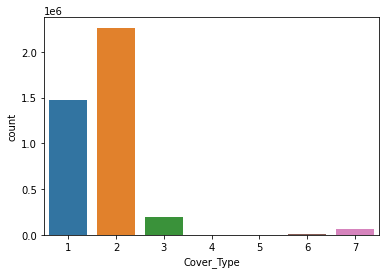

In [ ]:
sns.countplot(x=train.Cover_Type, data=train)

In [ ]:
#### 이상치 제거 전 boxplot


fig, axes = plt.subplots(2,5 , figsize=(20, 10))
green_diamond = dict(markerfacecolor='g', marker='D')
axes[0, 0].boxplot(train_df['Elevation'], flierprops=green_diamond)
axes[0, 0].set_title("Elevation")

axes[0, 1].boxplot(train_df['Slope'], flierprops=green_diamond)
axes[0, 1].set_title("Slope")

axes[0, 2].boxplot(train_df['x_dist_hydrlgy'], flierprops=green_diamond)
axes[0, 2].set_title("x_dist_hydrlgy")

axes[0, 3].boxplot(train_df['y_dist_hydrlgy'], flierprops=green_diamond)
axes[0, 3].set_title("y_dist_hydrlgy")

axes[0, 4].boxplot(train_df['x_dist_rdwys'], flierprops=green_diamond)
axes[0, 4].set_title("x_dist_rdwys")

axes[1, 0].boxplot(train_df['Hillshade_9am'], flierprops=green_diamond)
axes[1, 0].set_title("Hillshade_9am")

axes[1, 1].boxplot(train_df['Hillshade_Noon'], flierprops=green_diamond)
axes[1, 1].set_title("Hillshade_Noon")

axes[1, 2].boxplot(train_df['Hillshade_3pm'], flierprops=green_diamond)
axes[1, 2].set_title("Hillshade_3pm")

axes[1, 3].boxplot(train_df['x_dist_firepts'], flierprops=green_diamond)
axes[1, 3].set_title("x_dist_firepts")

axes[1, 4].boxplot(train_df['Aspect'], flierprops=green_diamond)
axes[1, 4].set_title("Aspect")

fig.suptitle('before outier remove boxplot', fontsize = 20)


plt.show()


### 이상치 제거 대상: 'Elevation', 'Slope', 'x_dist_hydrlgy', 'y_dist_hydrlgy', 'x_dist_rdwys', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'x_dist_firepts'   

# 클리핑(이상치 제거)

In [54]:
Outier_col = ['Elevation', 'Slope', 'x_dist_hydrlgy', 'y_dist_hydrlgy', 'x_dist_rdwys', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'x_dist_firepts' ]

In [55]:
# Check 1%, 99% points of training data per column
p01 = train_df[Outier_col].quantile(0.01)
p99 = train_df[Outier_col].quantile(0.99)

p01
p99

Elevation        3551.00000
Slope              39.00000
x_dist_hydrlgy   1123.00000
y_dist_hydrlgy    286.00000
x_dist_rdwys     5915.00000
Hillshade_9am     255.00000
Hillshade_Noon    255.00000
Hillshade_3pm     238.00000
x_dist_firepts   5705.00000
Name: 0.99, dtype: float64

In [56]:
# Values ​​below 1% point are clipped to 1% point, and values ​​above 99% point are clipped to 99% point.
train_df[Outier_col] = train_df[Outier_col].clip(p01, p99, axis=1)
test_df[Outier_col] = test_df[Outier_col].clip(p01, p99, axis=1)

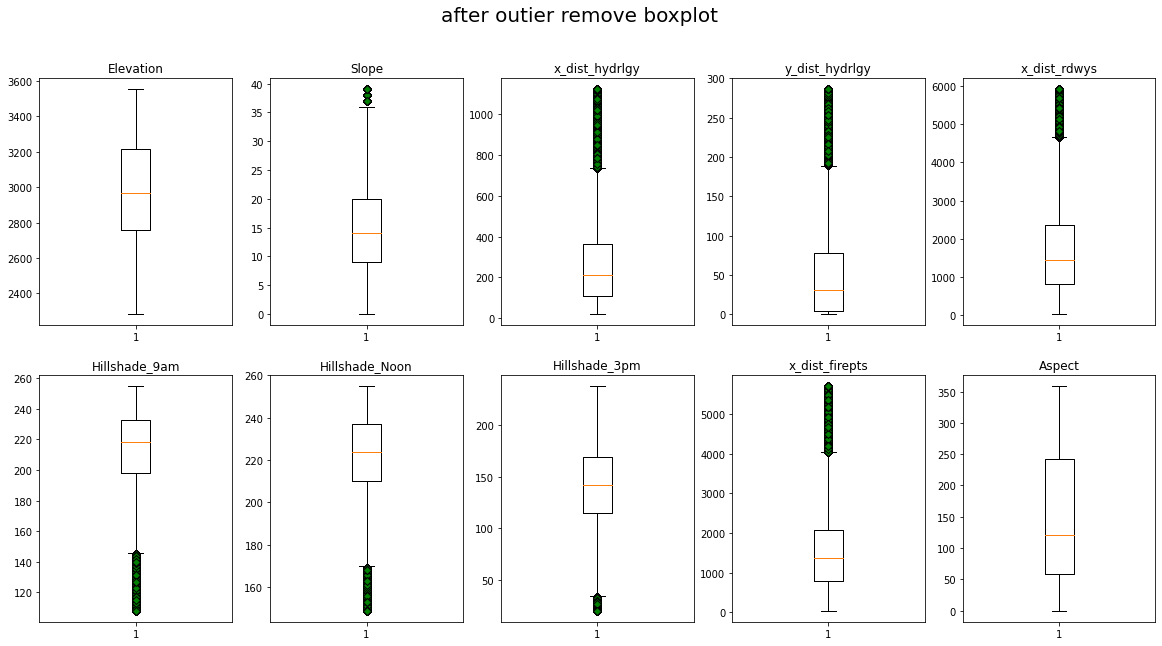

In [ ]:
#### 이상치 제거 후 boxplot

fig, axes = plt.subplots(2,5 , figsize=(20, 10))
green_diamond = dict(markerfacecolor='g', marker='D')
axes[0, 0].boxplot(train_df['Elevation'], flierprops=green_diamond)
axes[0, 0].set_title("Elevation")

axes[0, 1].boxplot(train_df['Slope'], flierprops=green_diamond)
axes[0, 1].set_title("Slope")

axes[0, 2].boxplot(train_df['x_dist_hydrlgy'], flierprops=green_diamond)
axes[0, 2].set_title("x_dist_hydrlgy")

axes[0, 3].boxplot(train_df['y_dist_hydrlgy'], flierprops=green_diamond)
axes[0, 3].set_title("y_dist_hydrlgy")

axes[0, 4].boxplot(train_df['x_dist_rdwys'], flierprops=green_diamond)
axes[0, 4].set_title("x_dist_rdwys")

axes[1, 0].boxplot(train_df['Hillshade_9am'], flierprops=green_diamond)
axes[1, 0].set_title("Hillshade_9am")

axes[1, 1].boxplot(train_df['Hillshade_Noon'], flierprops=green_diamond)
axes[1, 1].set_title("Hillshade_Noon")

axes[1, 2].boxplot(train_df['Hillshade_3pm'], flierprops=green_diamond)
axes[1, 2].set_title("Hillshade_3pm")

axes[1, 3].boxplot(train_df['x_dist_firepts'], flierprops=green_diamond)
axes[1, 3].set_title("x_dist_firepts")

axes[1, 4].boxplot(train_df['Aspect'], flierprops=green_diamond)
axes[1, 4].set_title("Aspect")

fig.suptitle('after outier remove boxplot', fontsize = 20)


plt.show()


**분포 시각화**

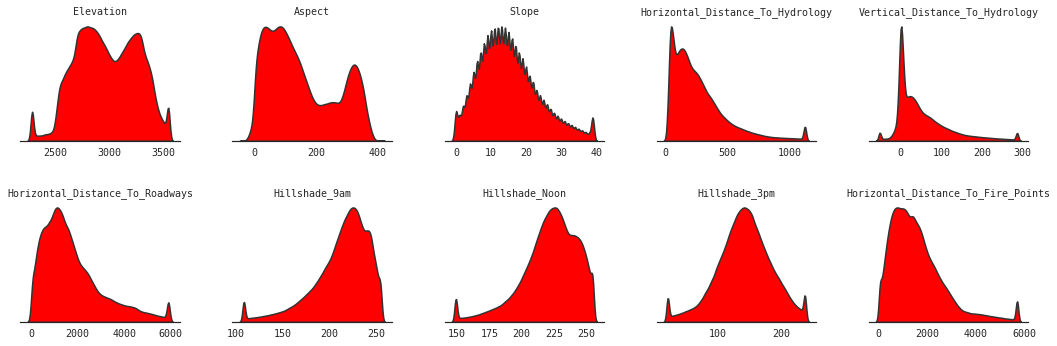

In [ ]:
fig = plt.figure(figsize = (15, 60))
for i in range(len(train_df.columns.tolist()[0:10])):
    plt.subplot(24,5,i+1)
    sns.set_style("white")
    plt.title(train_df.columns.tolist()[0:10][i], size = 10, fontname = 'monospace')
    a = sns.kdeplot(train_df[train_df.columns.tolist()[0:10][i]], shade = True, alpha = 0.9, linewidth = 1.5, facecolor='red', edgecolor=".2")
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(fontname = 'monospace')
    plt.yticks([])
    for j in ['right', 'left', 'top']:
        a.spines[j].set_visible(False)
        a.spines['bottom'].set_linewidth(1.2)
        
fig.tight_layout(h_pad = 3)
plt.show()

##정규화가 필요한 변수 : 'Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points'

# 기울어져 있는 분포 맞춰주기 - Yeo-Johnson transform

In [29]:
from sklearn.preprocessing import PowerTransformer

In [30]:
train_df.describe()

,Elevation,Aspect,Slope,x_dist_hydrlgy,y_dist_hydrlgy,x_dist_rdwys,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,x_dist_firepts,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,mnhttn_dist_hydrlgy,ecldn_dist_hydrlgy,ED_to_Hydrology
count,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000,4000000.00000
mean,2980.07201,148.88864,15.06078,270.17155,53.00665,1762.79619,211.99720,221.19310,140.90777,1575.11237,0.26119,0.04166,0.65357,0.02182,0.01684,0.03090,0.00428,0.03791,0.01572,0.00797,0.00290,0.01089,0.05454,0.02799,0.01829,0.03130,0.01498,0.01589,0.02067,0.01344,0.01381,0.01737,0.01154,0.03135,0.04917,0.02502,0.00326,0.01353,0.01177,0.01071,0.02227,0.02887,0.02749,0.03746,0.03782,0.01200,0.01605,0.01071,0.01221,0.04075,0.03924,0.03162,1.77134,324.96324,287.77740,287.77740
std,280.87627,108.36099,8.41235,220.97299,63.01449,1298.78886,30.02568,21.58644,42.93061,1096.87763,0.43928,0.19981,0.47583,0.14609,0.12868,0.17304,0.06525,0.19099,0.12437,0.08893,0.05377,0.10380,0.22708,0.16493,0.13400,0.17411,0.12146,0.12504,0.14228,0.11513,0.11671,0.13064,0.10680,0.17425,0.21622,0.15619,0.05699,0.11552,0.10783,0.10292,0.14757,0.16743,0.16352,0.18989,0.19076,0.10886,0.12568,0.10295,0.10981,0.19771,0.19416,0.17498,0.89381,236.95645,222.12751,222.12751
min,2284.00000,0.00000,0.00000,19.00000,0.00000,24.00000,108.00000,149.00000,20.00000,42.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
25%,2760.00000,59.00000,9.00000,110.00000,4.00000,822.00000,198.00000,210.00000,115.00000,781.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,157.00000,133.27040,133.27040
50%,2966.00000,120.00000,14.00000,213.00000,31.00000,1436.00000,218.00000,224.00000,142.00000,1361.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,270.00000,232.89912,232.89912
75%,3217.00000,242.00000,20.00000,361.00000,78.00000,2365.00000,233.00000,237.00000,169.00000,2084.00000,1.00000,0.00000,1.00000,0.00

In [31]:
box_cox_col = ['Elevation', 'Slope',  'x_dist_hydrlgy', 'y_dist_hydrlgy', 'x_dist_rdwys', 'Hillshade_9am', 'Hillshade_Noon', 'x_dist_firepts']

In [32]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(train_df[box_cox_col])

PowerTransformer()

In [33]:
# 변환 후의 데이터로 각 열을 치환
train_df[box_cox_col] = pt.transform(train_df[box_cox_col])
test_df[box_cox_col] = pt.transform(test_df[box_cox_col])

In [ ]:
x = train_df.x_dist_hydrlgy.values
sns.kdeplot(x)
plt.title("after Box-Cox-transform")
plt.show()

재현율, 민감도가 안나오는 4, 6 컬럼 증가

In [34]:
TARGET = 'Cover_Type'

target_df = pd.DataFrame(train[TARGET].value_counts()).reset_index()
target_df.columns = [TARGET, 'count']
fig = px.bar(data_frame =target_df, 
             x = 'Cover_Type',
             y = 'count' , 
             color = "count",
             color_continuous_scale="Emrld") 
fig.show()
target_df.sort_values(by =TARGET , ignore_index = True)

,Cover_Type,count
0,1,1468136
1,2,2262087
2,3,195712
3,4,377
4,5,1
5,6,11426
6,7,62261


In [11]:
target_4 = train[train['Cover_Type'] == 4]
target_6 = train[train['Cover_Type'] == 6]

target = pd.concat([target_4,target_6], axis=0)
target4_6 = target.drop(['Id','Cover_Type','Soil_Type15','Soil_Type7'],axis=1)
features = target4_6.columns

In [12]:
features

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
      dtype='object')

In [57]:
add_Statistic_by_section(train_df)
add_Statistic_by_section(test_df)

In [59]:
train_df.columns

Index(['Elevation', 'Aspect', 'Slope', 'x_dist_hydrlgy', 'y_dist_hydrlgy',
       'x_dist_rdwys', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'x_dist_firepts', 'Wilderness_Area1', 'Wilderness_Area2',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2',
       'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
       'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type', 'mnhttn_dist_hydrlgy', 'ecldn_dist_hydrlgy',
       'ED_to_Hydr

In [60]:
from sklearn.preprocessing import RobustScaler


cols = [
'Elevation', 'Aspect', 'Slope', 'x_dist_hydrlgy', 'y_dist_hydrlgy',
       'x_dist_rdwys', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'x_dist_firepts', 'mnhttn_dist_hydrlgy', 'ecldn_dist_hydrlgy',
       'ED_to_Hydrology', 'HillShade_mean', 'Wilderness_Area_mean',
       'Horizontal_mean', 'Soil_Type_mean', 'HillShade_min',
       'Wilderness_Area_min', 'Horizontal_min', 'Soil_Type_min',
       'HillShade_max', 'Wilderness_Area_max', 'Horizontal_max',
       'Soil_Type_max', 'HillShade_var', 'Wilderness_Area_var',
       'Horizontal_var', 'Soil_Type_var', 'HillShade_sum',
       'Wilderness_Area_sum', 'Horizontal_sum', 'Soil_Type_sum',
       'Wilderness_Area_kurt', 'Soil_Type_kurt'
]

scaler = RobustScaler()
train_df[cols] = scaler.fit_transform(train_df[cols])
test_df[cols] = scaler.transform(test_df[cols])

In [61]:
train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

Mem. usage decreased to 705.72 Mb (43.1% reduction)
Mem. usage decreased to 175.48 Mb (43.2% reduction)


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization


INPUT_SHAPE = test_df.shape[1:]
NUM_CLASSES = train_df["Cover_Type"].nunique()

def build_model():
    model = Sequential([
        Dense(units=300, kernel_initializer="lecun_normal", activation="selu", input_shape=INPUT_SHAPE),
        BatchNormalization(),
        Dense(units=200, kernel_initializer="lecun_normal", activation="selu"),
        BatchNormalization(),
        Dense(units=100, kernel_initializer="lecun_normal", activation="selu"),
        BatchNormalization(),
        Dense(units=50, kernel_initializer="lecun_normal", activation="selu"),
        BatchNormalization(),
        Dense(units=NUM_CLASSES, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [63]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=5
)

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=20,
    restore_best_weights=True
)

callbacks = [reduce_lr, early_stop]

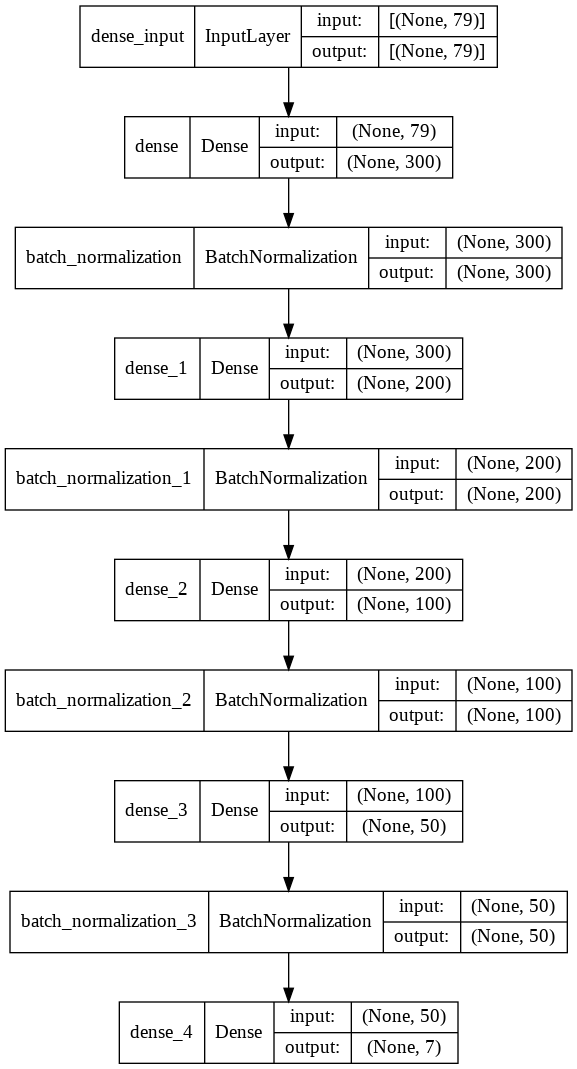

In [64]:
from tensorflow.keras.utils import plot_model


plot_model(
    build_model(),
    show_shapes=True,
    show_layer_names=True
)

In [65]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


X = train_df.drop("Cover_Type", axis=1).values
y = train_df["Cover_Type"].values

del train_df

FOLDS = 20
EPOCHS = 200
BATCH_SIZE = 2048

test_preds = np.zeros((1, 1))
scores = []

cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = build_model()
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks,
        verbose=False
    )

    y_pred = np.argmax(model.predict(X_val), axis=1)
    score = accuracy_score(y_val, y_pred)
    scores.append(score)

    test_preds = test_preds + model.predict(test_df)
    print(f"Fold {fold} Accuracy: {score}")

print()
print(f"Mean Accuracy: {np.mean(scores)}")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=20.



Fold 0 Accuracy: 0.0
Fold 1 Accuracy: 0.0
Fold 2 Accuracy: 0.0


KeyboardInterrupt: ignored

In [ ]:
test_preds = np.argmax(test_preds, axis=1)
test_preds = encoder.inverse_transform(test_preds)

sub_df['Cover_Type'] = test_preds
sub_df.head()

In [ ]:
sub_df.to_csv("submission.csv", index=False)